# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Reading CSV File

In [2]:
data = pd.read_csv("X:/IIIT/CS/application_data.csv")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,-2120,nan,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08304,0.26295,0.13938,0.02470,0.03690,0.97220,0.61920,0.01430,0.00000,0.06900,0.08330,0.12500,0.03690,0.02020,0.01900,0.00000,0.00000,0.02520,0.03830,0.97220,0.63410,0.01440,0.00000,0.06900,0.08330,0.12500,0.03770,0.02200,0.01980,0.00000,0.00000,0.02500,0.03690,0.97220,0.62430,0.01440,0.00000,0.06900,0.08330,0.12500,0.03750,0.02050,0.01930,0.00000,0.00000,reg oper account,block of flats,0.01490,"Stone, brick",No,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,nan,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31127,0.62225,nan,0.09590,0.05290,0.98510,0.79600,0.06050,0.08000,0.03450,0.29170,0.33330,0.01300,0.07730,0.05490,0.00390,0.00980,0.09240,0.05380,0.98510,0.80400,0.04970,0.08060,0.03450,0.29170,0.33330,0.01280,0.07900,0.05540,0.00000,0.00000,0.09680,0.05290,0.98510,0.79870,0.06080,0.08000,0.03450,0.29170,0.33330,0.01320,0.07870,0.05580,0.00390,0.01000,reg oper account,block of flats,0.07140,Block,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / 

# Analyzing the Data

In [3]:
data.shape

(307511, 122)

#Defining function to display metadata(containing Datatypes, Unique,Nulls, Null_Percent) of the columns in order to analyse structure of data

In [4]:

def meta(x):
    Nulls = x.isnull().sum()
    Null_Percent = (x.isnull().sum()/len(x))*100
    Unique = x.nunique()
    Datatypes = x.dtypes
    return pd.concat([Datatypes, Unique,Nulls, Null_Percent], axis=1, keys=['Data_Type', 'Unique','Nulls', 'Null_Percent' ])

data_info=meta(data)
data_info.reset_index(drop=False)


,index,Data_Type,Unique,Nulls,Null_Percent
0,SK_ID_CURR,int64,307511,0,0.00000
1,TARGET,int64,2,0,0.00000
2,NAME_CONTRACT_TYPE,object,2,0,0.00000
3,CODE_GENDER,object,3,0,0.00000
4,FLAG_OWN_CAR,object,2,0,0.00000
5,FLAG_OWN_REALTY,object,2,0,0.00000
6,CNT_CHILDREN,int64,15,0,0.00000
7,AMT_INCOME_TOTAL,float64,2548,0,0.00000
8,AMT_CREDIT,float64,5603,0,0.00000
9,AMT_ANNUITY,float64,13672,12,0.00390


In [5]:
#Filtering columns with null values < 45%

In [6]:
filtered_cols=list(data_info[(data_info.Null_Percent<45)].index)
filtered_cols

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [7]:
#Retrieving columns with null values > 50%

In [8]:
removed_cols50= list(data_info[(data_info.Null_Percent>50)].index)
removed_cols50

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [9]:
#Retrieving columns with null values >45% & <50%

In [10]:
removed_cols45= list(data_info[(data_info.Null_Percent>45)&(data_info.Null_Percent<50)].index)
removed_cols45

['YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE']

#It can be inferred from analysing the application_data that there are a high number of columns having null values above 45%
#So for cleaning data instead of using 50% null values as the cut off, we can use 45% for a more optimum result

# Data Cleaning

Creating a new dataframe for cleaner analysis by Dropping Columns based on their relavence to the analysis/High amount of Null Values

In [11]:
dataclean = data.drop([
    #Columns with low Causality on Outcome
        'FLAG_MOBIL','FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL',
        
        'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    #Columns with Null Value Percentages above 50                  
        'OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE',
    #Columns with Null Value Percentages above 45                   
        'YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE'
        ],axis=1)

#Finding the metadata of the new dataframe

In [12]:
data_info=meta(dataclean)
data_info.reset_index(drop=False)

,index,Data_Type,Unique,Nulls,Null_Percent
0,SK_ID_CURR,int64,307511,0,0.00000
1,TARGET,int64,2,0,0.00000
2,NAME_CONTRACT_TYPE,object,2,0,0.00000
3,CODE_GENDER,object,3,0,0.00000
4,FLAG_OWN_CAR,object,2,0,0.00000
5,FLAG_OWN_REALTY,object,2,0,0.00000
6,CNT_CHILDREN,int64,15,0,0.00000
7,AMT_INCOME_TOTAL,float64,2548,0,0.00000
8,AMT_CREDIT,float64,5603,0,0.00000
9,AMT_ANNUITY,float64,13672,12,0.00390


#Name of the coloumns that have been used for the new dataframe

In [13]:
filtered_cols=list(data_info[(data_info.Null_Percent<45)].index)
filtered_cols

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 

The following methods can be used for the respective rows to impute the relatively low missing values to get get accurate analysis

In [14]:

dataclean.DAYS_LAST_PHONE_CHANGE = dataclean.DAYS_LAST_PHONE_CHANGE.fillna(value = dataclean.DAYS_LAST_PHONE_CHANGE.mean() )

dataclean.OCCUPATION_TYPE = dataclean.OCCUPATION_TYPE.fillna(value = 'Undefined')
dataclean.NAME_TYPE_SUITE = dataclean.NAME_TYPE_SUITE.fillna(value = dataclean.NAME_TYPE_SUITE.value_counts()[1])
dataclean.AMT_GOODS_PRICE = dataclean.AMT_GOODS_PRICE.fillna(value = dataclean.AMT_GOODS_PRICE.median())
dataclean.CNT_FAM_MEMBERS = dataclean.CNT_FAM_MEMBERS.fillna(value = dataclean.CNT_FAM_MEMBERS.value_counts()[1])


dataclean.EXT_SOURCE_2 = dataclean.EXT_SOURCE_2.fillna(value = dataclean.EXT_SOURCE_2.mean() )
dataclean.EXT_SOURCE_3 = dataclean.EXT_SOURCE_3.fillna(value = dataclean.EXT_SOURCE_3.mean() )

dataclean.OBS_30_CNT_SOCIAL_CIRCLE = dataclean.OBS_30_CNT_SOCIAL_CIRCLE.fillna(value = dataclean.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()[1])
dataclean.OBS_60_CNT_SOCIAL_CIRCLE = dataclean.OBS_60_CNT_SOCIAL_CIRCLE.fillna(value = dataclean.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()[1])
dataclean.DEF_30_CNT_SOCIAL_CIRCLE = dataclean.DEF_30_CNT_SOCIAL_CIRCLE.fillna(value = dataclean.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()[1])
dataclean.DEF_60_CNT_SOCIAL_CIRCLE = dataclean.DEF_60_CNT_SOCIAL_CIRCLE.fillna(value = dataclean.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()[1])


dataclean.AMT_REQ_CREDIT_BUREAU_HOUR = dataclean.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(value = dataclean.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()[1] )
dataclean.AMT_REQ_CREDIT_BUREAU_DAY = dataclean.AMT_REQ_CREDIT_BUREAU_DAY.fillna(value = dataclean.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()[1])
dataclean.AMT_REQ_CREDIT_BUREAU_WEEK = dataclean.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(value = dataclean.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()[1])
dataclean.AMT_REQ_CREDIT_BUREAU_MON = dataclean.AMT_REQ_CREDIT_BUREAU_MON.fillna(value = dataclean.AMT_REQ_CREDIT_BUREAU_MON.value_counts()[1])
dataclean.AMT_REQ_CREDIT_BUREAU_QRT = dataclean.AMT_REQ_CREDIT_BUREAU_QRT.fillna(value = dataclean.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()[1])
dataclean.AMT_REQ_CREDIT_BUREAU_YEAR = dataclean.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(value = dataclean.AMT_REQ_CREDIT_BUREAU_YEAR.median())



Replacing negative values with absolute since they are days and dropping relatively low 12 null values left with dropna


In [15]:
dataclean.DAYS_LAST_PHONE_CHANGE = dataclean.DAYS_LAST_PHONE_CHANGE.abs()
dataclean.DAYS_BIRTH = dataclean.DAYS_BIRTH.abs()
dataclean.DAYS_EMPLOYED = dataclean.DAYS_EMPLOYED.abs()
dataclean.DAYS_REGISTRATION = dataclean.DAYS_REGISTRATION.abs()
dataclean.DAYS_ID_PUBLISH = dataclean.DAYS_ID_PUBLISH.abs()


dataclean.dropna(axis = 0, inplace=True)

In [16]:
dataclean.EXT_SOURCE_2 = dataclean.EXT_SOURCE_2*100
dataclean.EXT_SOURCE_3 = dataclean.EXT_SOURCE_3*100

dataclean['AGE'] = dataclean.DAYS_BIRTH/365.25 #To even consider leap years
dataclean['YEARS_ID_PUBLISH'] = dataclean.DAYS_ID_PUBLISH/365.25
dataclean['YEARS_EMPLOYED'] = dataclean.DAYS_EMPLOYED/365.25
dataclean['YEARS_REGISTRATION'] = dataclean.DAYS_REGISTRATION/365.25
dataclean['YEARS_LAST_PHONE_CHANGE'] = dataclean.DAYS_LAST_PHONE_CHANGE/365.25

dataclean = dataclean.drop(['DAYS_BIRTH','DAYS_ID_PUBLISH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_LAST_PHONE_CHANGE'], axis =1)

In [17]:
dataclean.nunique()

SK_ID_CURR                     307499
TARGET                              2
NAME_CONTRACT_TYPE                  2
CODE_GENDER                         3
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
CNT_CHILDREN                       15
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
AMT_GOODS_PRICE                  1002
NAME_TYPE_SUITE                     8
NAME_INCOME_TYPE                    8
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
OCCUPATION_TYPE                    19
CNT_FAM_MEMBERS                    18
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT

In [18]:
dataclean.isna().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
EXT_SOURCE

Converting Data types to desirable format for analysis
- Converting Categorical data to Object (Unique values below 40)
- Converting Continuous data to Float (Unique values above 40)

In [19]:

dataclean.TARGET = dataclean.TARGET.astype('str')
dataclean.SK_ID_CURR = dataclean.SK_ID_CURR.astype('str')
dataclean.CNT_CHILDREN = dataclean.CNT_CHILDREN.astype('str')
dataclean.CNT_FAM_MEMBERS = dataclean.CNT_FAM_MEMBERS.astype('str')
dataclean.REGION_RATING_CLIENT = dataclean.REGION_RATING_CLIENT.astype('str')
dataclean.REGION_RATING_CLIENT_W_CITY = dataclean.REGION_RATING_CLIENT_W_CITY.astype('str')
dataclean.HOUR_APPR_PROCESS_START = dataclean.HOUR_APPR_PROCESS_START.astype('str')
dataclean.REG_REGION_NOT_LIVE_REGION = dataclean.REG_REGION_NOT_LIVE_REGION.astype('str')
dataclean.REG_REGION_NOT_WORK_REGION = dataclean.REG_REGION_NOT_WORK_REGION.astype('str')
dataclean.LIVE_REGION_NOT_WORK_REGION = dataclean.LIVE_REGION_NOT_WORK_REGION.astype('str')
dataclean.REG_CITY_NOT_LIVE_CITY = dataclean.REG_CITY_NOT_LIVE_CITY.astype('str')
dataclean.REG_CITY_NOT_WORK_CITY = dataclean.REG_CITY_NOT_WORK_CITY.astype('str')
dataclean.LIVE_CITY_NOT_WORK_CITY = dataclean.LIVE_CITY_NOT_WORK_CITY.astype('str')

dataclean.OBS_30_CNT_SOCIAL_CIRCLE = dataclean.OBS_30_CNT_SOCIAL_CIRCLE.astype('str')
dataclean.OBS_60_CNT_SOCIAL_CIRCLE = dataclean.OBS_60_CNT_SOCIAL_CIRCLE.astype('str')
dataclean.DEF_30_CNT_SOCIAL_CIRCLE = dataclean.DEF_30_CNT_SOCIAL_CIRCLE.astype('str')
dataclean.DEF_60_CNT_SOCIAL_CIRCLE = dataclean.DEF_60_CNT_SOCIAL_CIRCLE.astype('str')

dataclean.AMT_REQ_CREDIT_BUREAU_HOUR = dataclean.AMT_REQ_CREDIT_BUREAU_HOUR.astype('str')
dataclean.AMT_REQ_CREDIT_BUREAU_DAY = dataclean.AMT_REQ_CREDIT_BUREAU_DAY.astype('str')
dataclean.AMT_REQ_CREDIT_BUREAU_WEEK = dataclean.AMT_REQ_CREDIT_BUREAU_WEEK.astype('str')
dataclean.AMT_REQ_CREDIT_BUREAU_MON = dataclean.AMT_REQ_CREDIT_BUREAU_MON.astype('str')
dataclean.AMT_REQ_CREDIT_BUREAU_QRT = dataclean.AMT_REQ_CREDIT_BUREAU_QRT.astype('str')
dataclean.AMT_REQ_CREDIT_BUREAU_YEAR = dataclean.AMT_REQ_CREDIT_BUREAU_YEAR.astype('str')

dataclean.AGE = dataclean.AGE.astype(float)
dataclean.YEARS_EMPLOYED = dataclean.YEARS_EMPLOYED.astype(float)
dataclean.YEARS_ID_PUBLISH = dataclean.YEARS_ID_PUBLISH.astype(float)



In [20]:
dataclean.dtypes

SK_ID_CURR                      object
TARGET                          object
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    object
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                 object
REGION_RATING_CLIENT            object
REGION_RATING_CLIENT_W_CITY     object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START         object
REG_REGION_NOT_LIVE_REGION      object
REG_REGION_NOT_WORK_REGION      object
LIVE_REGION_NOT_WORK_REGI

In [21]:
dataclean.select_dtypes('object').columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [22]:
dataclean.select_dtypes('float').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'AGE',
       'YEARS_ID_PUBLISH', 'YEARS_EMPLOYED', 'YEARS_REGISTRATION',
       'YEARS_LAST_PHONE_CHANGE'],
      dtype='object')

# Checking Outliers 

These are Columns that contain Outliers

In [65]:

# sns.boxplot(dataclean.AMT_GOODS_PRICE)
# sns.boxplot(dataclean.AMT_ANNUITY)
# sns.boxplot(dataclean.AMT_CREDIT)
# sns.boxplot(dataclean.AMT_INCOME_TOTAL)
# sns.boxplot(dataclean.REGION_POPULATION_RELATIVE)
# sns.boxplot(dataclean.YEARS_EMPLOYED)
# sns.boxplot(dataclean.YEARS_REGISTRATION)
# sns.boxplot(dataclean.EXT_SOURCE_3)
# sns.boxplot(dataclean.YEARS_LAST_PHONE_CHANGE)


These are columns without outliers

In [66]:
# sns.boxplot(dataclean.AGE)
# sns.boxplot(dataclean.YEARS_ID_PUBLISH)
# sns.boxplot(dataclean.EXT_SOURCE_2)

In [26]:
dataclean.CODE_GENDER.value_counts()

F      202440
M      105055
XNA         4
Name: CODE_GENDER, dtype: int64

The Outliers of YEARS_EMPLOYED(Modification of DAYS_EMPLOYED)

In [27]:
#These are outliers where numbers of years exceed the Age of the person
#An observation is made is made that all cases of this case have the same outlier of '999.98084'
dataclean[dataclean.AGE<dataclean.YEARS_EMPLOYED]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_ID_PUBLISH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_LAST_PHONE_CHANGE
8,100011,0,Cash loans,F,N,Y,0,112500.00000,1019610.00000,33826.50000,913500.00000,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.01863,Undefined,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,20.57473,75.17237,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55.02806,9.62081,999.98084,20.33402,0.00000
11,100015,0,Cash loans,F,N,Y,0,38419.15500,148365.00000,10678.50000,135000.00000,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.01522,Undefined,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,55.51832,65.28966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,55.89870,6.87748,999.98084,14.36277,6.55989
23,100027,0,Cash loans,F,N,Y,0,83250.00000,239850.00000,23850.00000,225000.00000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.00630,Undefined,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,62.43047,66.90567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,67.97262,10.08624,999.98084,24.67351,2.17659
38,100045,0,Cash loans,F,N,Y,0,99000.00000,247275.00000,17338.50000,225000.00000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.00621,Undefined,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,65.07648,75.17237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,65.48939,13.60438,999.98084,26.87748,0.00000
43,100050,0,Cash loans,F,N,Y,0,108000.00000,746280.00000,42970.50000,675000.00000,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.01097,Undefined,1.0,2,2,WEDNESDAY,9,0,0,0,0,0,0,XNA,76.61378,68.48277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,64.47091,12.52841,999.98084,15.72895,1.34428
46,100053,0,Cash loans,F,N,Y,0,202500.00000,305221.50000,17649.00000,252000.00000,Family,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.01969,Undefined,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,24.76647,47.58499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,55.77823,5.45654,999.98084,21.24572,1.77687
54,100062,0,Cash loans,M,Y,N,0,81000.00000,675000.00000,32472.00000,675000.00000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.01001,Undefined,2.0,2,2,TUESDAY,17,0,0,0,0,0,0,XNA,66.28649,73.80196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,50.95414,5.86448,999.98084,18.98973,1.26489
56,100064,0,Cash loans,F,N,N,0,67500.00000,298728.00000,15381.00000,202500.00000,Family,Pensioner,Secondary / secondary special,Single / not married,Municipal apartment,0.01910,Undefined,1.0,2,2,MONDAY,9,0,0,0,0,0,0,XNA,62.27083,16.94287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.19507,3.67967,999.98084,5.52772,0.00000
62,100073,0,Cash loans,M,Y,Y,0,324000.00000,1130760.00000,40189.50000,810000.00000,Unaccompanied,Pensioner,Higher education,Civil marriage,House / apartment,0.01885,Undefined,2.0,2,2,THURSDAY,9,0,0,0,0,0,0,XNA,73.30512,23.40152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,62.54073,10.86105,999.98084,2.85284,6.52977
79,100094,0,Cash loans,F,N,Y,0,108000.00000,113760.00000,5301.00000,90000.00000,Unaccompanied,Pensioner,Higher education,Single / not married,House / apartment,0.03076,Undefined,1.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,58.27355,45

### Checking Outliers - Based on YEARS_EMPLOYED


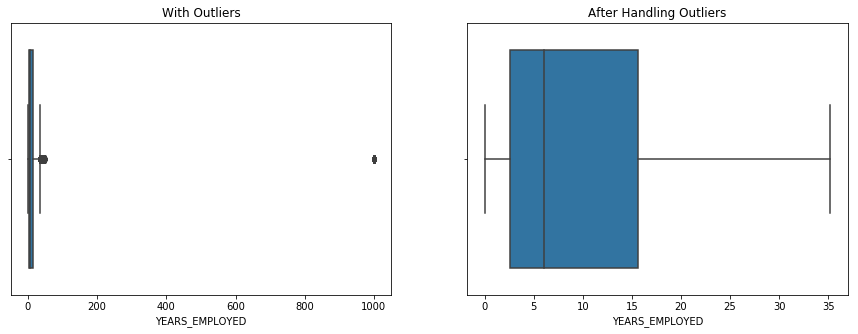

In [28]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('With Outliers')

sns.boxplot(dataclean.YEARS_EMPLOYED)           
plt.subplot(1,2,2)
plt.title('After Handling Outliers')

sns.boxplot(dataclean['YEARS_EMPLOYED'],showfliers=False)


plt.show()

### Checking Outliers - Based on AMT_INCOME_TOTAL


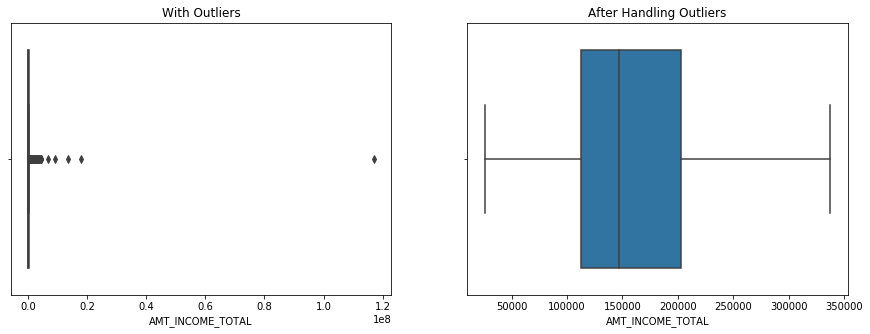

In [29]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('With Outliers')

sns.boxplot(dataclean.AMT_INCOME_TOTAL)          
plt.subplot(1,2,2)
plt.title('After Handling Outliers')

sns.boxplot(dataclean.AMT_INCOME_TOTAL,showfliers=False)


plt.show()

In [30]:
# test.YEARS_EMPLOYED = datacheck['YEARS_EMPLOYED'].replace(to_replace=999.98084,value=6.07529)
# test.YEARS_EMPLOYED.describe()

### Checking Outliers - Based on AMT_CREDIT

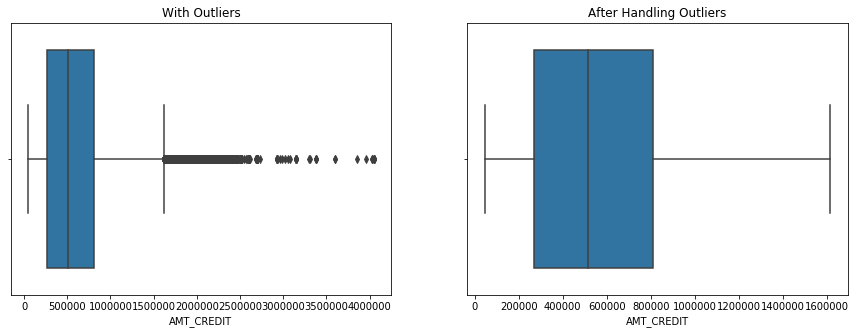

In [31]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('With Outliers')
sns.boxplot(dataclean.AMT_CREDIT)          
plt.subplot(1,2,2)
plt.title('After Handling Outliers')

sns.boxplot(dataclean.AMT_CREDIT,showfliers=False)


plt.show()

### Checking Outliers - Based on YEARS_REGISTRATION

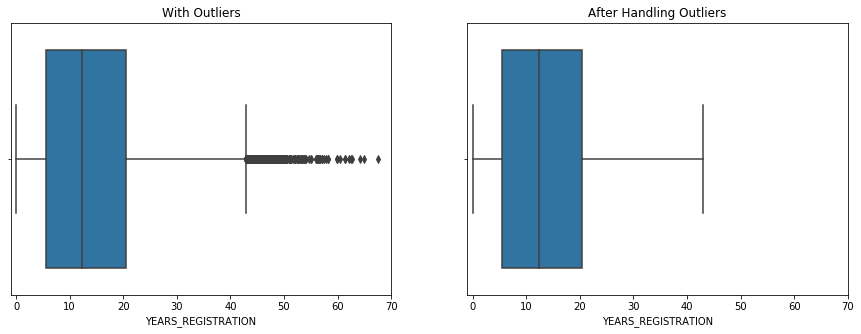

In [32]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('With Outliers')
plt.xlim(-1,70)

sns.boxplot(dataclean.YEARS_REGISTRATION)          
plt.subplot(1,2,2)
plt.title('After Handling Outliers')
plt.xlim(-1,70)

sns.boxplot(dataclean.YEARS_REGISTRATION,showfliers=False)


plt.show()

### Checking Outliers - Based on YEARS_LAST_PHONE_CHANGE

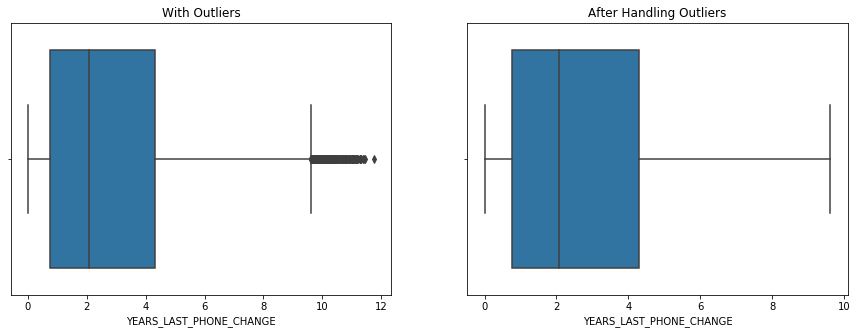

In [33]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('With Outliers')

sns.boxplot(dataclean.YEARS_LAST_PHONE_CHANGE)          
plt.subplot(1,2,2)
plt.title('After Handling Outliers')

sns.boxplot(dataclean.YEARS_LAST_PHONE_CHANGE,showfliers=False)


plt.show()

# Binning

Creating Bins for AGE

In [34]:
loan = dataclean.copy()
loan['AGE_BINS'] = pd.cut(loan['AGE'], bins = [18.0, 35.0, 55.0, 75.0], 
                        labels = ["Adult","Middle_Aged","Senior"])
loan.AGE_BINS.value_counts()

Middle_Aged    154445
Adult           84657
Senior          68397
Name: AGE_BINS, dtype: int64

In [ ]:
### Binning - Based on AGE_BINS

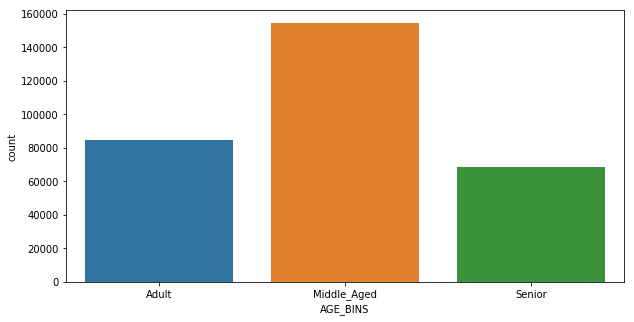

In [35]:
plt.figure(figsize = (10,5))
sns.countplot(loan['AGE_BINS'])
plt.show()

In [36]:
loan.AGE_BINS.value_counts(normalize=True)*100

Middle_Aged   50.22618
Adult         27.53082
Senior        22.24300
Name: AGE_BINS, dtype: float64

Creating Bins for Income

In [37]:
loan['INCOME_BINS'] = pd.cut(loan['AMT_INCOME_TOTAL'], bins = [25649.0,100000.0,200000.0,1000000.0,117000000.0], 
                        labels = ["low-income", "lower-medium income", "higher-medium income", "high income"])
loan.INCOME_BINS.value_counts()

lower-medium income     155893
higher-medium income     87660
low-income               63696
high income                250
Name: INCOME_BINS, dtype: int64

In [ ]:
### Binning - Based on INCOME_BINS

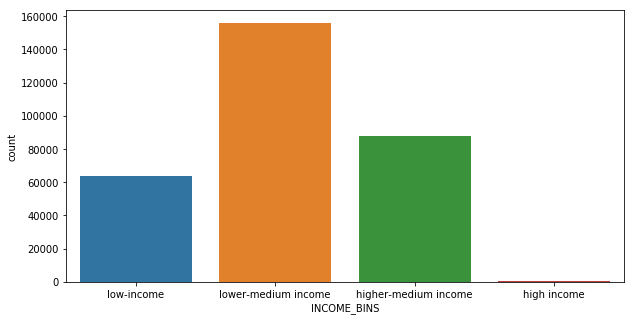

In [38]:
plt.figure(figsize = (10,5))
sns.countplot(loan['INCOME_BINS'])
plt.show()

In [39]:
loan.AGE_BINS.value_counts(normalize=True)*100

Middle_Aged   50.22618
Adult         27.53082
Senior        22.24300
Name: AGE_BINS, dtype: float64

# Data Imbalance

In [40]:
imbalance_check = loan['TARGET'].value_counts(normalize=True)*100
imbalance_check

0   91.92680
1    8.07320
Name: TARGET, dtype: float64

Text(0.5,0,"{0: 'Non-Defaulter', 1: 'Defaulter'}")

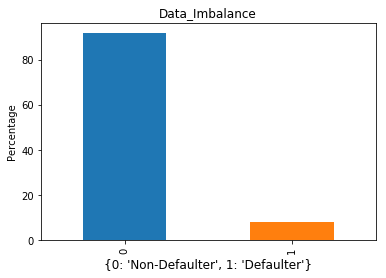

In [41]:
imbalance_check.plot.bar()
plt.title("Data_Imbalance")
plt.ylabel("Percentage")
plt.xlabel({0: "Non-Defaulter", 1: "Defaulter"},fontsize=12)

In [42]:
#There is a high data imbalance, its almost 9:1

# Correlation

In [43]:
#Creating Different Dataframes to analyse correlations of defaulters and non-defaulters

loan_0 = loan[loan['TARGET']=='0']
loan_1 = loan[loan['TARGET']=='1']

#    # Correlation Heatmap of Non-Defaulters

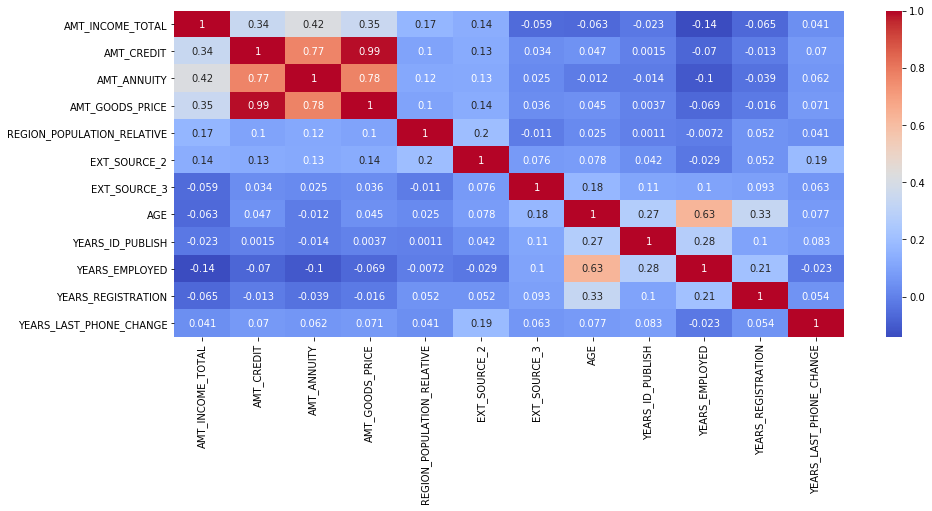

In [44]:
plt.figure(figsize=(15,6))
sns.heatmap(loan_0.corr(method='pearson',min_periods=10000),annot=True,cmap='coolwarm')

In [45]:
corr = loan_0.corr()

corr_loan = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_loan = corr_loan.unstack().reset_index().dropna(subset = [0]).sort_values(by=0, ascending = False)
corr_loan.columns = ['Var1','Var2','Correlation Value']
corr_loan['Corr_Abs'] = abs(corr_loan['Correlation Value'])
corr_loan.sort_values(by = "Corr_Abs", ascending = False)
corr_loan

,Var1,Var2,Correlation Value,Corr_Abs
37,AMT_GOODS_PRICE,AMT_CREDIT,0.98702,0.98702
38,AMT_GOODS_PRICE,AMT_ANNUITY,0.77643,0.77643
25,AMT_ANNUITY,AMT_CREDIT,0.77131,0.77131
115,YEARS_EMPLOYED,AGE,0.62612,0.62612
24,AMT_ANNUITY,AMT_INCOME_TOTAL,0.41895,0.41895
36,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.34942,0.34942
12,AMT_CREDIT,AMT_INCOME_TOTAL,0.34279,0.34279
127,YEARS_REGISTRATION,AGE,0.33316,0.33316
116,YEARS_EMPLOYED,YEARS_ID_PUBLISH,0.27667,0.27667
103,YEARS_ID_PUBLISH,AGE,0.27131,0.27131


#  # Correlation Heatmap of Defaulters

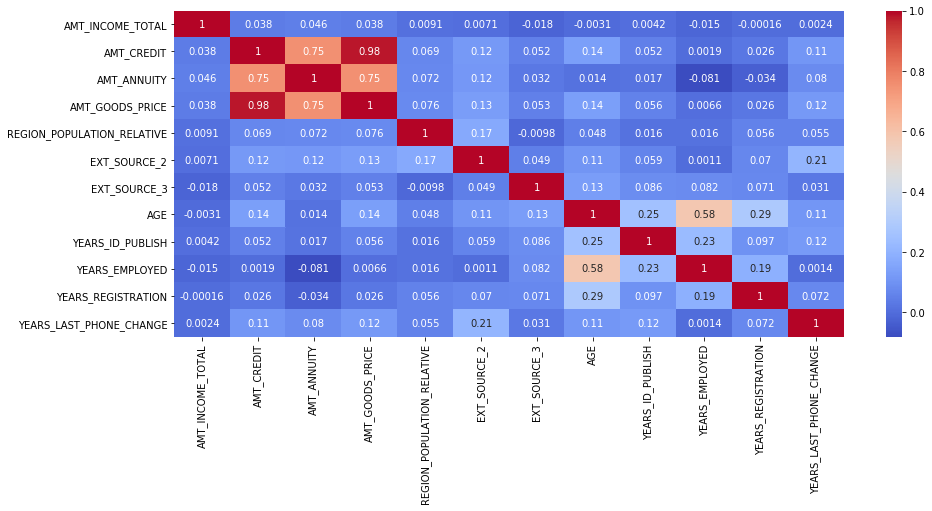

In [46]:
plt.figure(figsize=(15,6))
sns.heatmap(loan_1.corr(method='pearson',min_periods=10000),annot=True,cmap='coolwarm')

In [47]:
corr = loan_1.corr()

corr_loan = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_loan = corr_loan.unstack().reset_index().dropna(subset = [0]).sort_values(by=0, ascending = False)
corr_loan.columns = ['Var1','Var2','Correlation Value']
corr_loan['Corr_Abs'] = abs(corr_loan['Correlation Value'])
corr_loan.sort_values(by = "Corr_Abs", ascending = False)
corr_loan

,Var1,Var2,Correlation Value,Corr_Abs
37,AMT_GOODS_PRICE,AMT_CREDIT,0.98278,0.98278
38,AMT_GOODS_PRICE,AMT_ANNUITY,0.75230,0.75230
25,AMT_ANNUITY,AMT_CREDIT,0.75219,0.75219
115,YEARS_EMPLOYED,AGE,0.58219,0.58219
127,YEARS_REGISTRATION,AGE,0.28911,0.28911
103,YEARS_ID_PUBLISH,AGE,0.25286,0.25286
116,YEARS_EMPLOYED,YEARS_ID_PUBLISH,0.22909,0.22909
137,YEARS_LAST_PHONE_CHANGE,EXT_SOURCE_2,0.20730,0.20730
129,YEARS_REGISTRATION,YEARS_EMPLOYED,0.19246,0.19246
64,EXT_SOURCE_2,REGION_POPULATION_RELATIVE,0.16977,0.16977


AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE have a high correlation among Non-Defaulter while Defaulters Hardly have them correlated

#An important inference can be made that when analysing the heatmaps of Defaulters and Non-Defaulters
-There is high correlation between AMT_INCOME_TOTAL and [AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE] for Non-Defaulters
-There is low correlation between AMT_INCOME_TOTAL and [AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE] for Defaulters

# Univariate

#### UNIVARIATE Continuous-Based on AGE


X:\PythonIDE\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


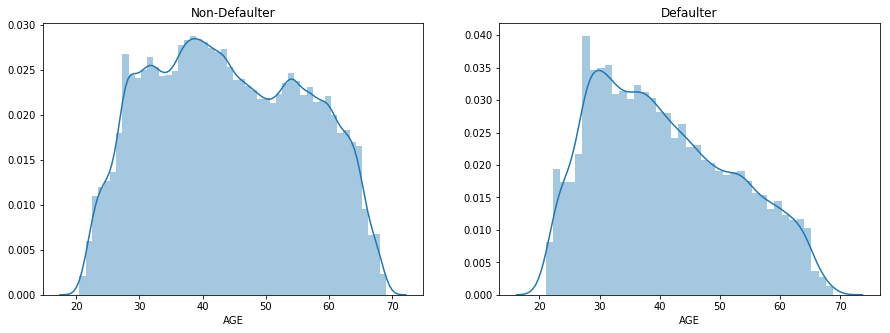

In [48]:

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
sns.distplot(loan_0['AGE'])
           
plt.subplot(1,2,2)
plt.title('Defaulter')
sns.distplot(loan_1['AGE'])


plt.show()

#It can be inferred defaulters are more saturated more towards younger ages(20-40) while Older age people have higher chances of paying the loan back

#### UNIVARIATE Continuous-Based on YEARS_EMPLOYED

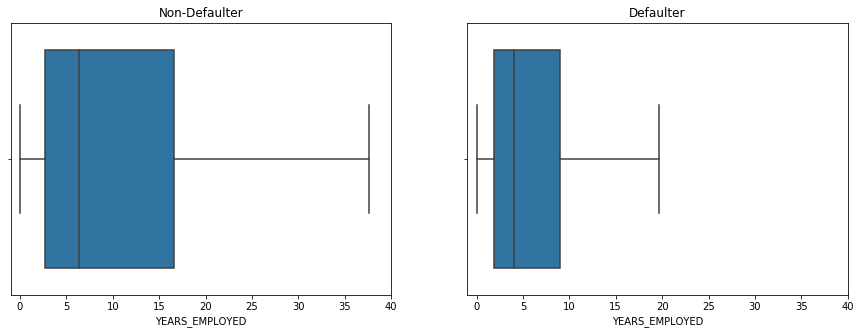

In [49]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Non-Defaulter')
plt.xlim(-1,40)
sns.boxplot(loan_0['YEARS_EMPLOYED'],showfliers=False)
           
plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xlim(-1,40)
sns.boxplot(loan_1['YEARS_EMPLOYED'],showfliers=False)


plt.show()

-From the boxplots it can be inferred that the distribution of non-defaulters is more saturated towards higher periods of employment (i.e until 40 years)
-whereas for defaulter it's more likely that they're employed for lower number of years (i.e <20) this can even be observed through mean and mode

#### UNIVARIATE Continuous-Based on YEARS_ID_PUBLISH

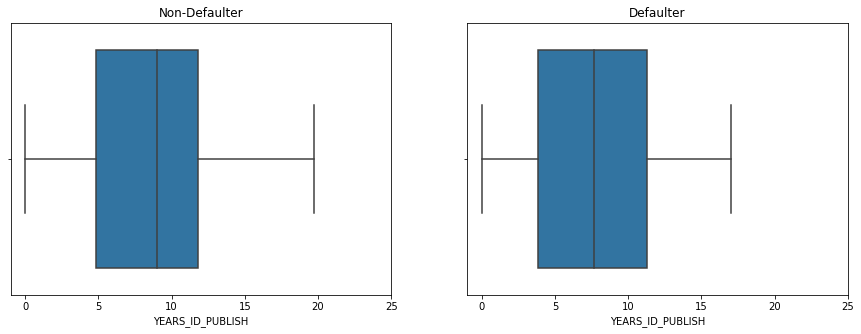

In [50]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
plt.xlim(-1,25)
sns.boxplot(loan_0['YEARS_ID_PUBLISH'],showfliers=False)

           
plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xlim(-1,25)

sns.boxplot(loan_1['YEARS_ID_PUBLISH'],showfliers=False)


plt.show()

###Univariate - Categorical

### Univariate - Categorical based on AGE_BINS

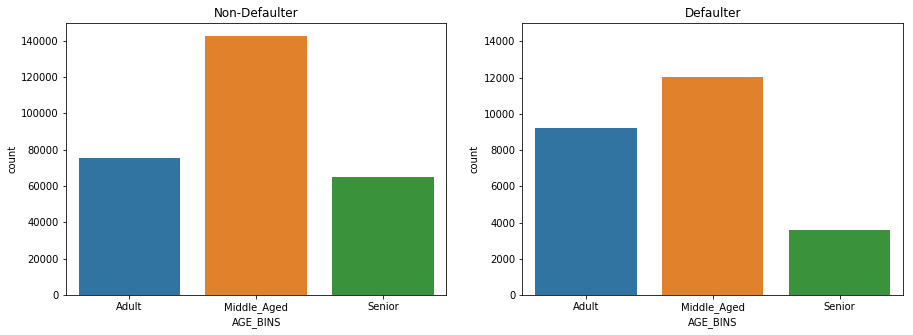

In [51]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
sns.countplot(loan_0['AGE_BINS'])
           
plt.subplot(1,2,2)
plt.title('Defaulter')
plt.ylim(0,15000)
sns.countplot(loan_1['AGE_BINS'])


plt.show()

### Univariate - Categorical based on INCOME_BINS

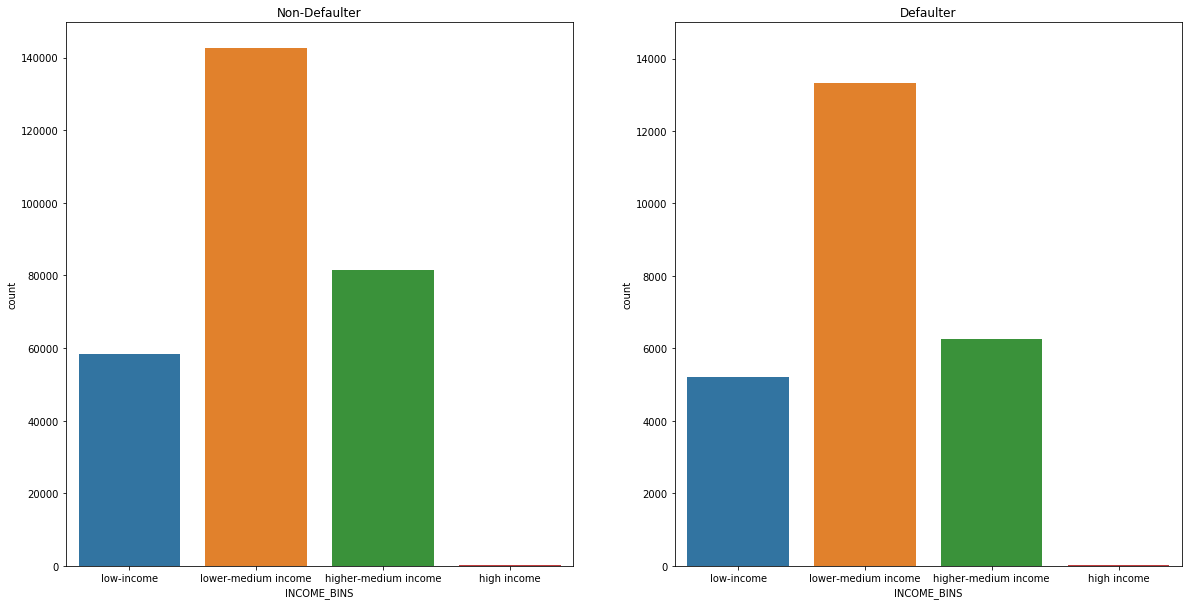

In [52]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
sns.countplot(loan_0['INCOME_BINS'])
           
plt.subplot(1,2,2)
plt.title('Defaulter')
plt.ylim(0,15000)

sns.countplot(loan_1['INCOME_BINS'])


plt.show()

### Univariate - Categorical based on NAME_INCOME_TYPE

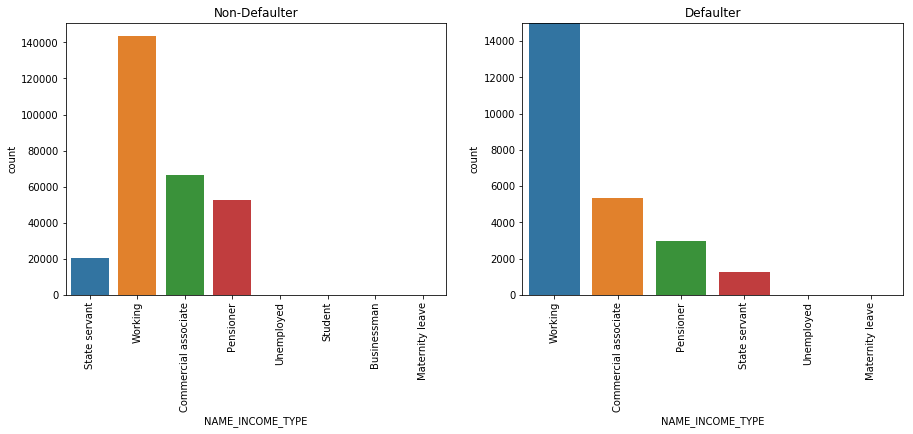

In [53]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')

plt.tick_params(axis='x', rotation=90)

sns.countplot(loan_0['NAME_INCOME_TYPE'])
           
plt.subplot(1,2,2)
plt.title('Defaulter')
plt.tick_params(axis='x', rotation=90)
plt.ylim(0,15000)


sns.countplot(loan_1.NAME_INCOME_TYPE)


plt.show()

### Univariate - Categorical based on CODE_GENDER

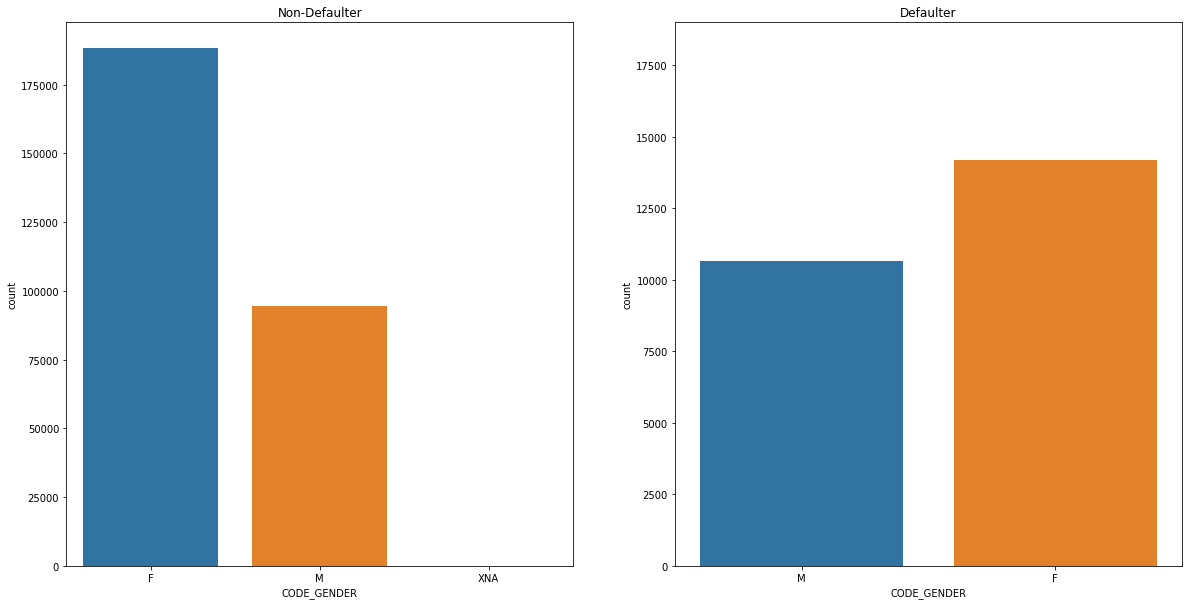

In [54]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
sns.countplot(loan_0['CODE_GENDER'])
           
plt.subplot(1,2,2)
plt.title('Defaulter')
plt.ylim(0,19000)

sns.countplot(loan_1['CODE_GENDER'])


plt.show()

### Univariate - Categorical based on OCCUPATION_TYPE

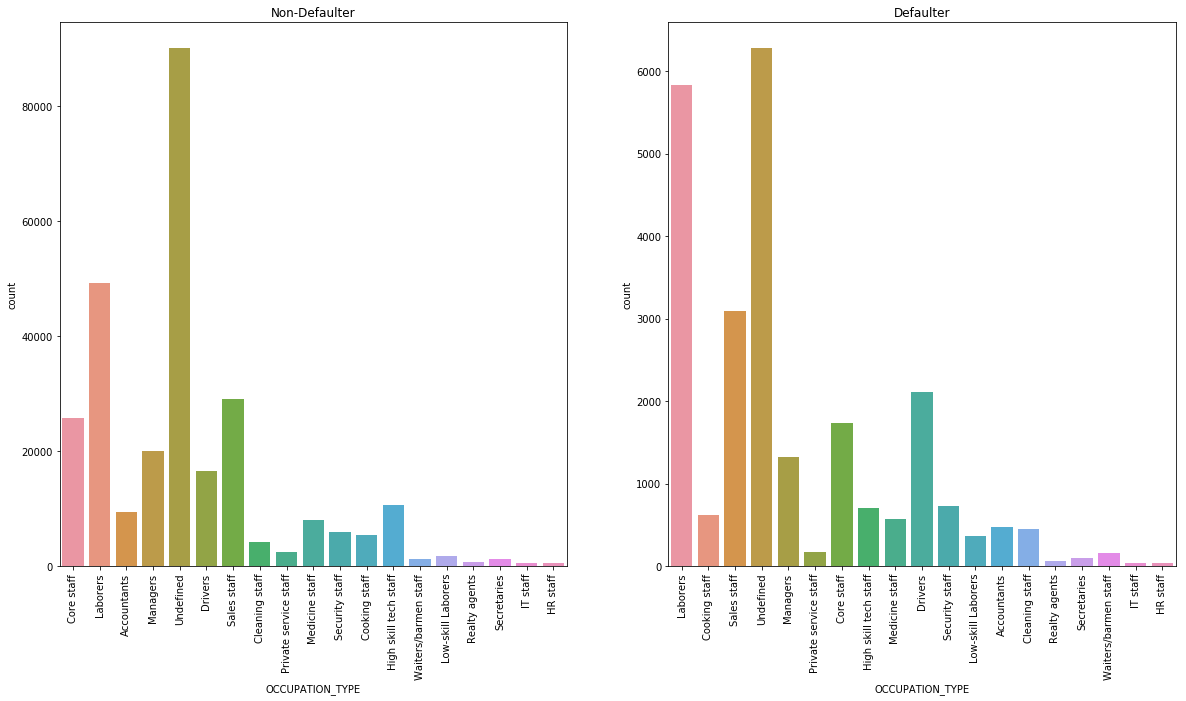

In [55]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
plt.xticks(rotation=90)
sns.countplot(loan_0['OCCUPATION_TYPE'])
           
plt.subplot(1,2,2)
plt.title('Defaulter')
plt.xticks(rotation=90)

sns.countplot(loan_1['OCCUPATION_TYPE'])


plt.show()

# BIVARIATE Continuous-Categorical

### Bivariate - based on AMT_ANNUITY and AGE_BINS

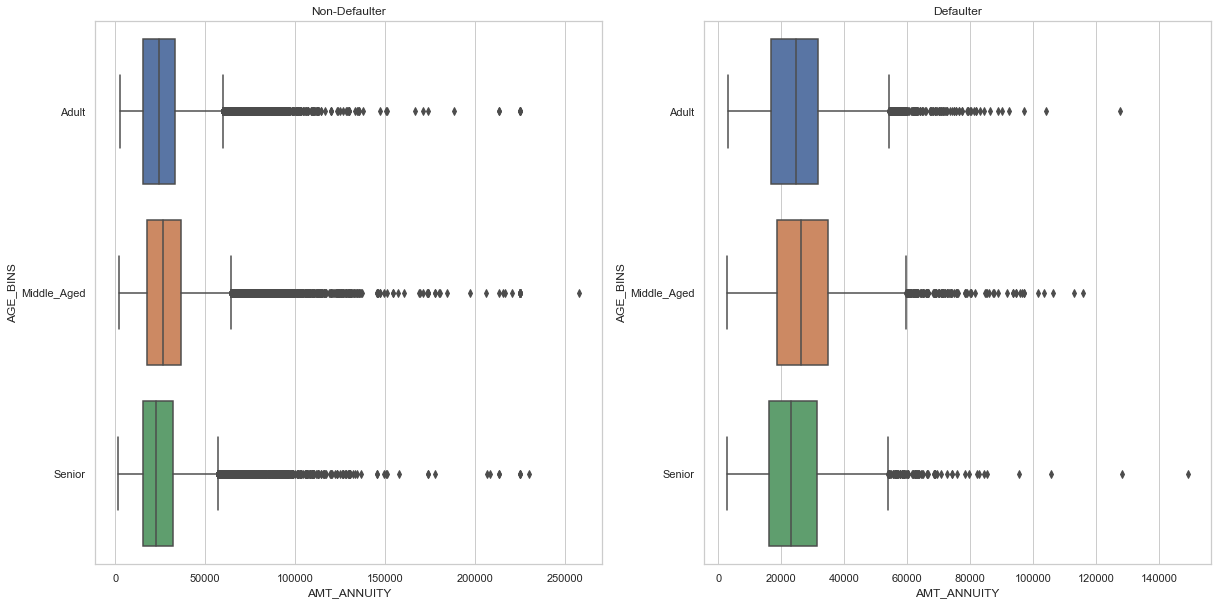

In [69]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')

sns.boxplot(x='AMT_ANNUITY',y='AGE_BINS',data=loan_0)           
plt.subplot(1,2,2)
plt.title('Defaulter')

sns.boxplot(x='AMT_ANNUITY',y='AGE_BINS',data=loan_1)
plt.show()

# BIVARIATE Continuous-Continuous

### Bivariate - based on AMT_INCOME_TOTAL and AMT_ANNUITY

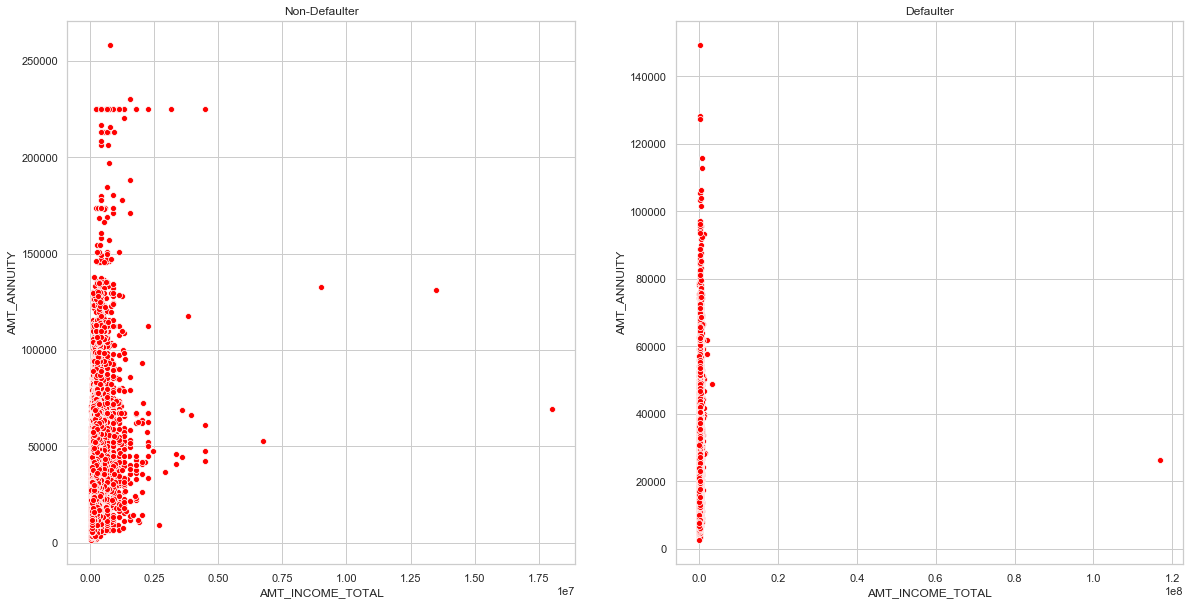

In [58]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')

sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_ANNUITY',data=loan_0,color='red')
plt.subplot(1,2,2)
plt.title('Defaulter')

sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_ANNUITY',data=loan_1,color='red')
plt.show()

### Bivariate - based on AMT_INCOME_TOTAL and AMT_GOODS_PRICE

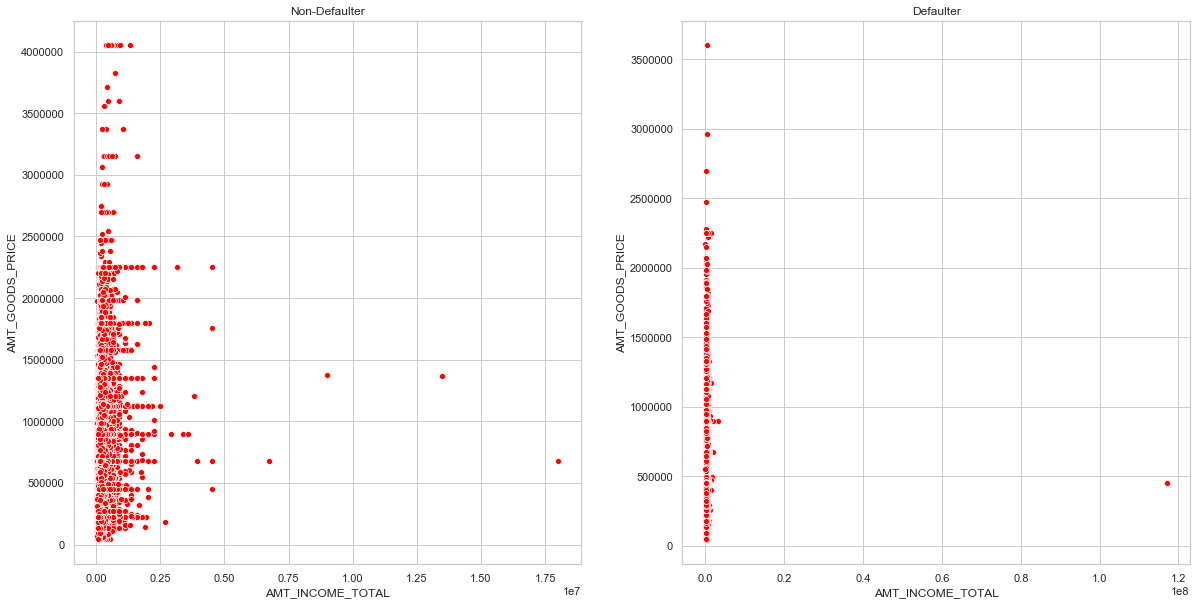

In [59]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')

sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_GOODS_PRICE',data=loan_0,color='red')
plt.subplot(1,2,2)
plt.title('Defaulter')

sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_GOODS_PRICE',data=loan_1,color='red')
plt.show()

In [60]:
# sns.jointplot('AMT_ANNUITY','AMT_CREDIT',loan_0)
# sns.jointplot('AMT_ANNUITY','AMT_CREDIT',loan_1)

### Bivariate - based on AMT_INCOME_TOTAL and AMT_CREDIT

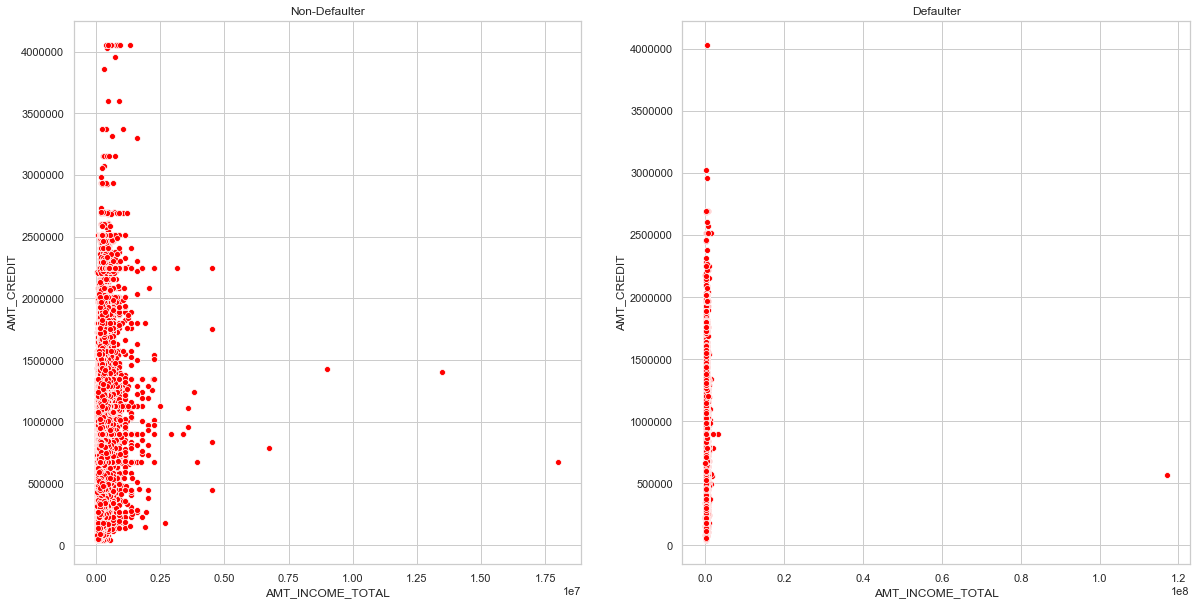

In [61]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')

sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data=loan_0,color='red')
plt.subplot(1,2,2)
plt.title('Defaulter')

sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',data=loan_1,color='red')
plt.show()

# BIVARIATE Cat-Cat

### Bivariate - based on NAME_INCOME_TYPE and INCOME_BINS

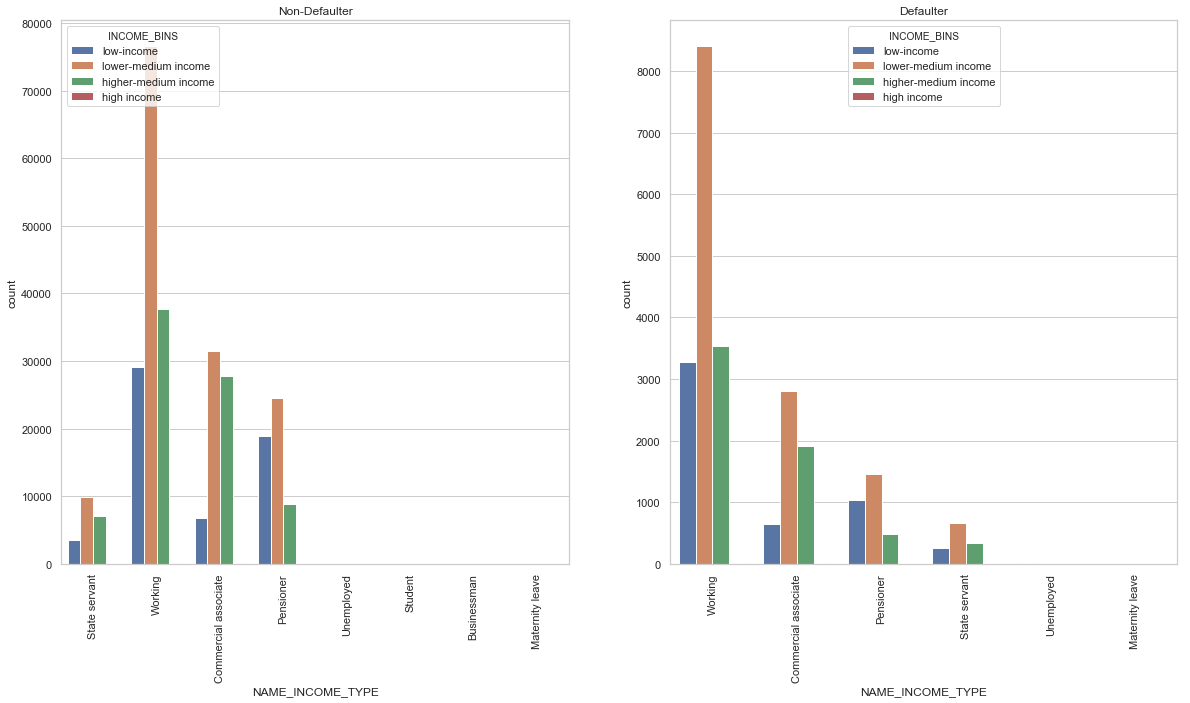

In [62]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
plt.tick_params(axis='x', rotation=90)
sns.countplot('NAME_INCOME_TYPE', hue='INCOME_BINS',data=loan_0)
plt.subplot(1,2,2)
plt.title('Defaulter')
plt.tick_params(axis='x', rotation=90)
sns.countplot('NAME_INCOME_TYPE', hue='INCOME_BINS',data=loan_1)
plt.show()

### Bivariate - based on NAME_INCOME_TYPE and AGE_BINS

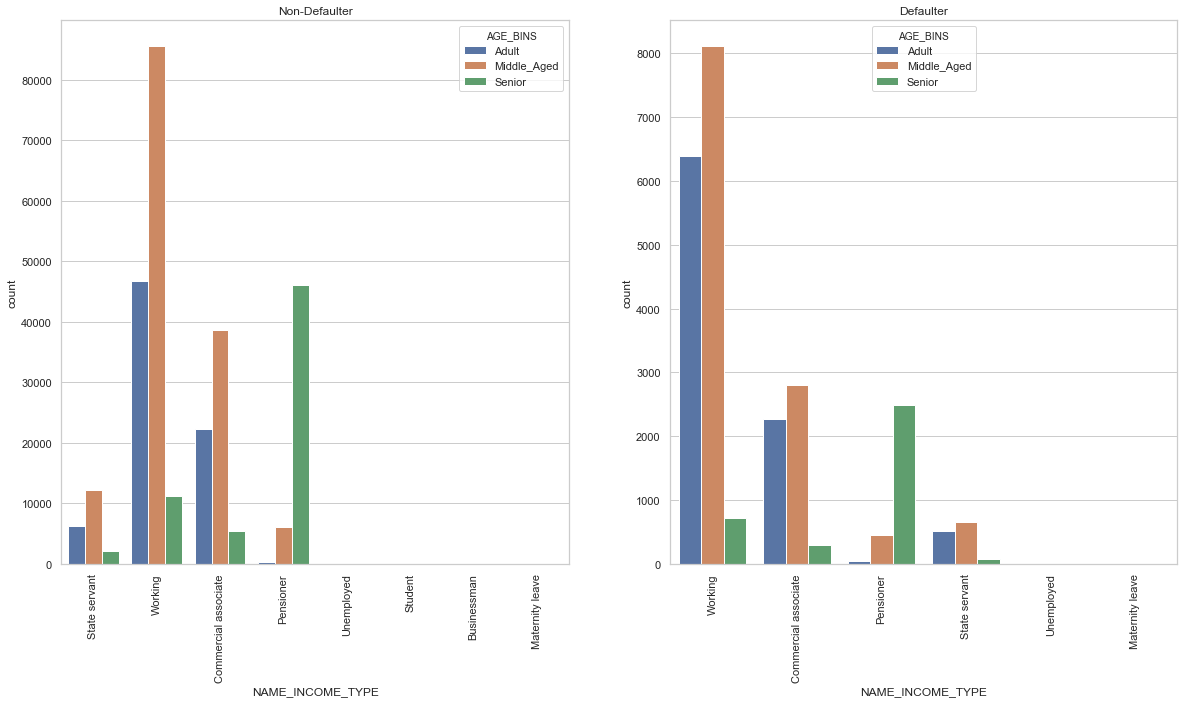

In [63]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title('Non-Defaulter')
plt.tick_params(axis='x', rotation=90)
sns.countplot('NAME_INCOME_TYPE', hue='AGE_BINS',data=loan_0)
plt.subplot(1,2,2)
plt.title('Defaulter')
plt.tick_params(axis='x', rotation=90)
sns.countplot('NAME_INCOME_TYPE', hue='AGE_BINS',data=loan_1)
plt.show()